# Plant Disease Prediction

## Importing Dataset

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Importing libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

 Preprocessing

 Training

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 18345 files belonging to 10 classes.


 Validation Image

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 4585 files belonging to 10 classes.


## Building Model

In [4]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

c:\Users\Aditya\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Dropout(0.20))

In [10]:
cnn.add(tf.keras.layers.Flatten())

In [11]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [12]:
cnn.add(tf.keras.layers.Dropout(0.3)) 

In [13]:

cnn.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [14]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │    13,825,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        15,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,012,766 (57.27 MB)

 Trainable params: 15,012,766 (57.27 MB)

 Non-trainable params: 0 (0.00 B)

### Compiling and Training Phase

In [15]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 564s 972ms/step - accuracy: 0.4666 - loss: 1.8454 - val_accuracy: 0.7908 - val_loss: 0.6093
Epoch 2/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 536s 933ms/step - accuracy: 0.8122 - loss: 0.5495 - val_accuracy: 0.8624 - val_loss: 0.4038
Epoch 3/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 539s 940ms/step - accuracy: 0.8785 - loss: 0.3504 - val_accuracy: 0.8885 - val_loss: 0.3366
Epoch 4/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 663s 1s/step - accuracy: 0.9030 - loss: 0.2757 - val_accuracy: 0.9010 - val_loss: 0.2965
Epoch 5/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 1439s 3s/step - accuracy: 0.9360 - loss: 0.1794 - val_accuracy: 0.9243 - val_loss: 0.2342
Epoch 6/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 26360s 46s/step - accuracy: 0.9521 - loss: 0.1394 - val_accuracy: 0.9420 - val_loss: 0.1818
Epoch 7/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 554s 964ms/step - accuracy: 0.9671 - loss: 0.0991 - val_accuracy: 0.9296 - val_loss: 0.2172
Epoch 8/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 555s 967ms/step - accuracy: 0.9713 - loss

## Evaluating Model

In [17]:

train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

574/574 ━━━━━━━━━━━━━━━━━━━━ 98s 171ms/step - accuracy: 0.9926 - loss: 0.0238
Training accuracy: 0.994875967502594


In [18]:

val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

144/144 ━━━━━━━━━━━━━━━━━━━━ 24s 166ms/step - accuracy: 0.9540 - loss: 0.1644
Validation accuracy: 0.9513631463050842


### Saving Model

In [19]:
cnn.save('trained_plant_disease_model_tomato.keras')

In [20]:

import json
with open('training_hist_tomato.json','w') as f:
  json.dump(training_history.history,f)

In [21]:
training_history.history

{'accuracy': [0.6306350231170654,
  0.8344507813453674,
  0.8923957347869873,
  0.9184519052505493,
  0.9439629316329956,
  0.9558462500572205,
  0.9668029546737671,
  0.9712728261947632,
  0.975252091884613,
  0.9755792021751404],
 'loss': [1.1228152513504028,
  0.47822949290275574,
  0.3079664409160614,
  0.22901718318462372,
  0.16080833971500397,
  0.12692835927009583,
  0.0962371751666069,
  0.08165579289197922,
  0.07344057410955429,
  0.06707880645990372],
 'val_accuracy': [0.790839672088623,
  0.8623773455619812,
  0.8885496258735657,
  0.9009814858436584,
  0.9243184328079224,
  0.9419847130775452,
  0.9295529127120972,
  0.9358778595924377,
  0.94547438621521,
  0.9513631463050842],
 'val_loss': [0.6093045473098755,
  0.4038366973400116,
  0.3366389870643616,
  0.2965002954006195,
  0.23421089351177216,
  0.1817663460969925,
  0.21721160411834717,
  0.21117456257343292,
  0.16718031466007233,
  0.16655507683753967]}

In [22]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


 Accuracy Visualization

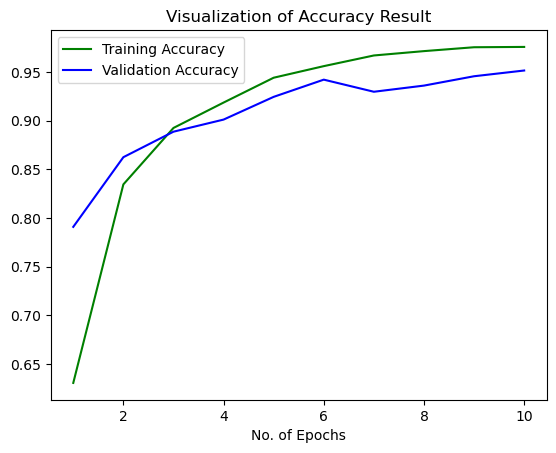

In [23]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='green',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

other metrics for model evaluation

In [24]:
class_name = validation_set.class_names

In [25]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 4585 files belonging to 10 classes.


In [26]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

4585/4585 ━━━━━━━━━━━━━━━━━━━━ 76s 16ms/step


In [27]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)


In [28]:
Y_true

<tf.Tensor: shape=(4585,), dtype=int64, numpy=array([0, 0, 0, ..., 9, 9, 9], dtype=int64)>

In [29]:
predicted_categories

<tf.Tensor: shape=(4585,), dtype=int64, numpy=array([0, 0, 0, ..., 9, 9, 9], dtype=int64)>

In [30]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [31]:

print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.97      0.95      0.96       425
                        Tomato___Early_blight       0.93      0.91      0.92       480
                         Tomato___Late_blight       0.94      0.95      0.95       463
                           Tomato___Leaf_Mold       0.95      0.97      0.96       470
                  Tomato___Septoria_leaf_spot       0.94      0.88      0.91       436
Tomato___Spider_mites Two-spotted_spider_mite       0.92      0.96      0.94       435
                         Tomato___Target_Spot       0.92      0.94      0.93       457
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.99      0.98      0.99       490
                 Tomato___Tomato_mosaic_virus       0.97      1.00      0.99       448
                             Tomato___healthy       0.98      0.98      0.98       481

                                     accu

### Confusion Matrix Visualization

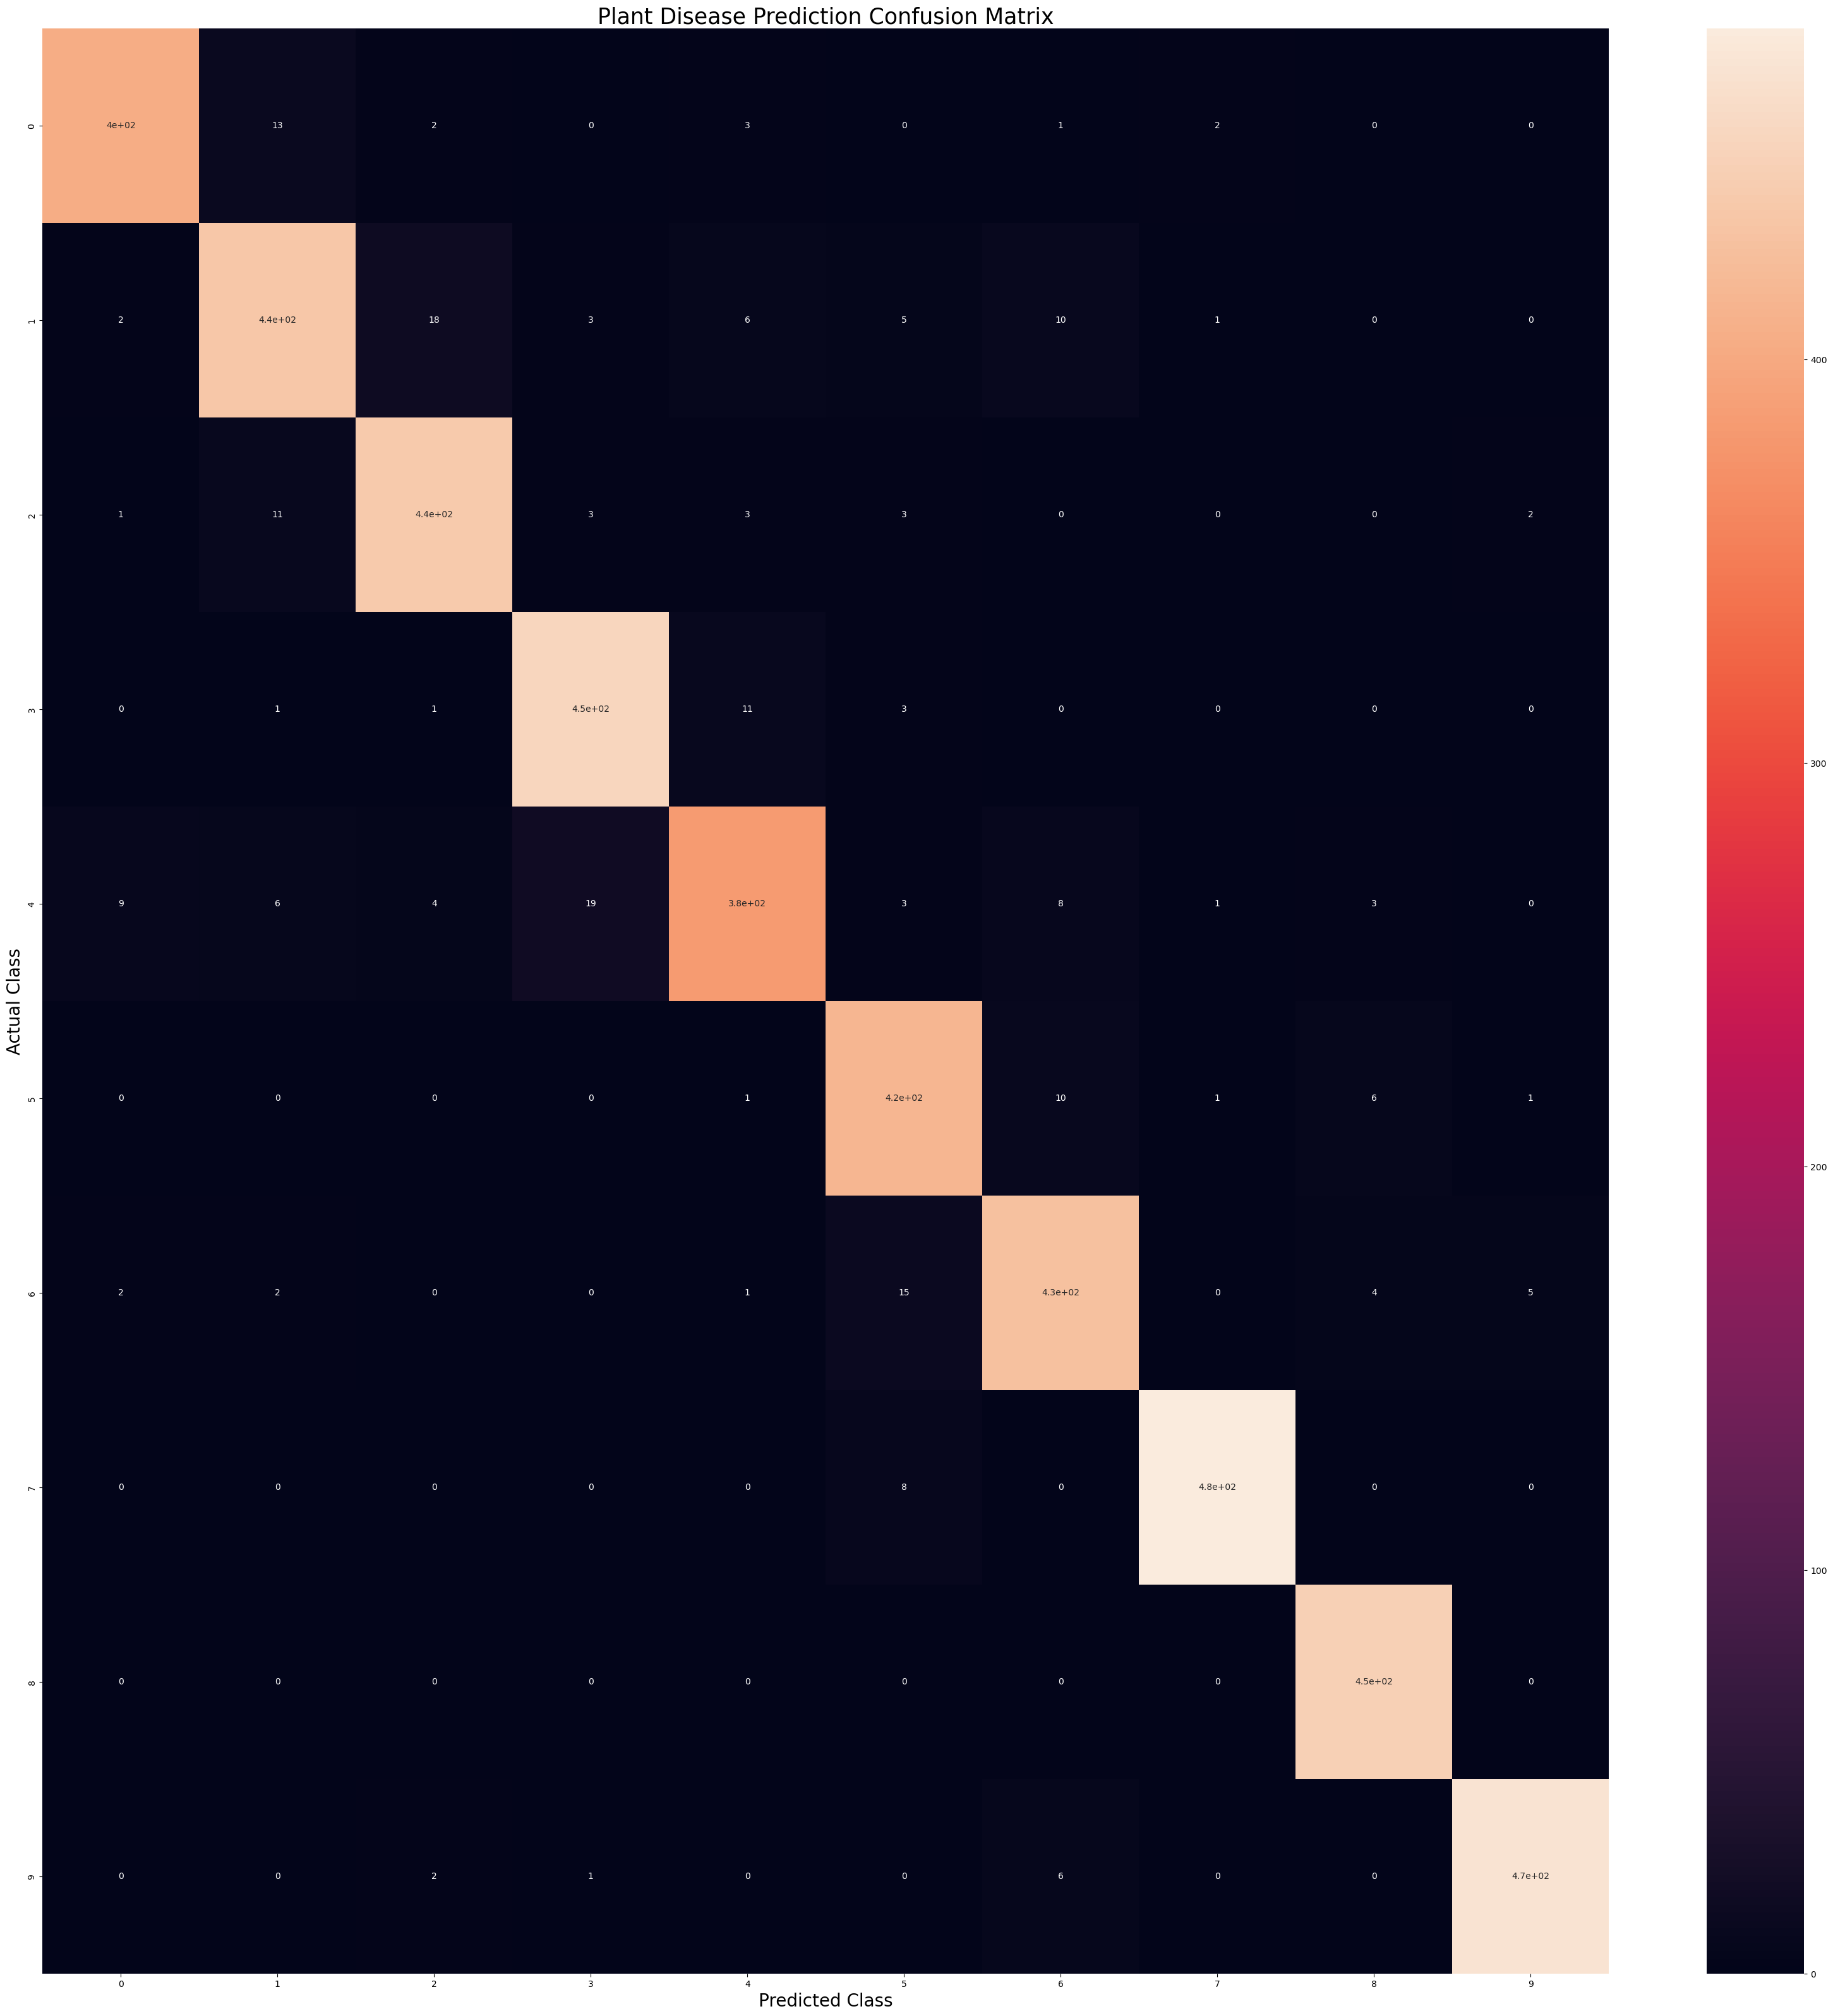

In [32]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()